<a href="https://colab.research.google.com/github/koejonluis/Image-Segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Image = an array of pixels
# pixel = has a/some visual attributes

# similarity = brightness, color, position
# Segmentation types = 1. Semantic 2. Instance
# Complex image analysis = CNN

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
import numpy as np
import cv2

Saving ladybug.png to ladybug.png


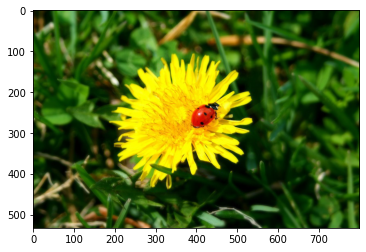

In [ ]:
uploaded = files.upload()
# image = cv2.imread("BettleBugonFlower.jpg")
image = cv2.imread("ladybug.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
image.shape
# dimenstions (height, width, colorChannels(rgb))

(533, 800, 3)

In [ ]:
# Converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in  the 3-D space of RGB
vectorized = image.reshape((-1,3))
vectorized = np.float32(vectorized)   #converting into required data type
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [ ]:
K = 12
attempts=10
ret, label, center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
                              # data, numberOfClusters, terminationCriteria, noOfAttempts, typoOfTermination

In [ ]:
center = np.uint8(center)

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((image.shape))

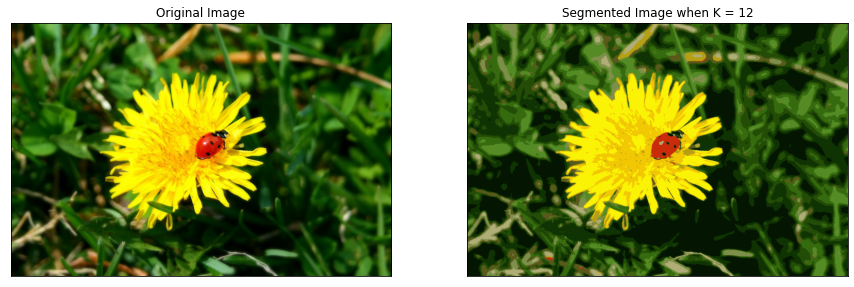

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()